<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.
| Variable      | Description                                                         |
| ------------- | ------------------------------------------------------------------- |
|       CRIM    | per capita crime rate by town                                       |
|       ZN      | proportion of residential land zoned for lots over 25,000 sq.ft.    |
|       INDUS   | proportion of non-retail business acres per town.                   |
|       CHAS    | Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
|       NOX     | nitric oxides concentration (parts per 10 million)                  |
|       RM      | average number of rooms per dwelling                                |
|       AGE     | proportion of owner-occupied units built prior to 1940              |
|       DIS     | weighted distances to five Boston employment centres                |
|       RAD     | index of accessibility to radial highways                           |
|       TAX     | full value property tax rate per $10,000                            |
|       PTRATIO | pupil-teacher ratio by town                                         |
|       LSTAT   | % lower status of the population                                    |
|       MEDV    | Median value of owner-occupied homes in $1000's                     |

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')


#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [ ]:


med = boston_df['MEDV'].median()
print(med)

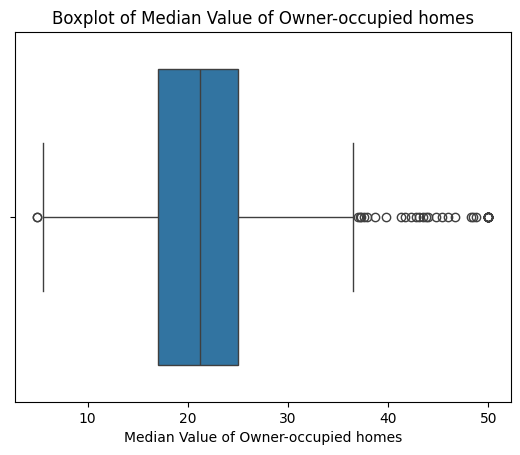

In [3]:
# Median Value of Owner-occupied homes

sns.boxplot(x=boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-occupied homes')
pyplot.xlabel('Median Value of Owner-occupied homes')
pyplot.show()

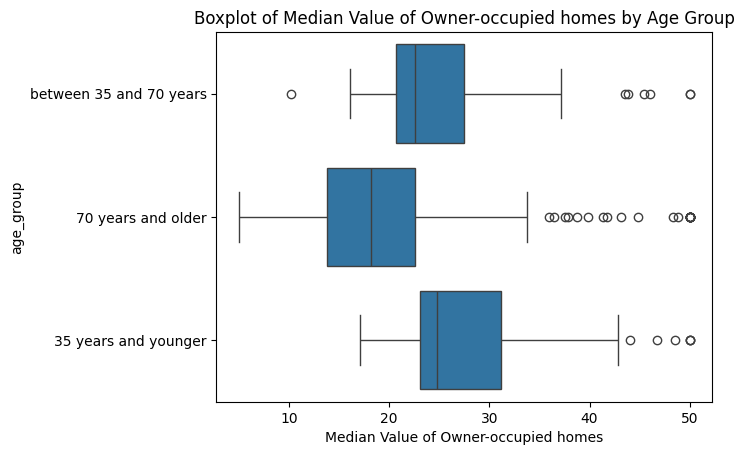

In [5]:
# Boxplot MEDV variable vs AGE variable (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

sns.boxplot(x=boston_df['MEDV'],y=boston_df['age_group'])
pyplot.title('Boxplot of Median Value of Owner-occupied homes by Age Group')
pyplot.xlabel('Median Value of Owner-occupied homes')
pyplot.show()




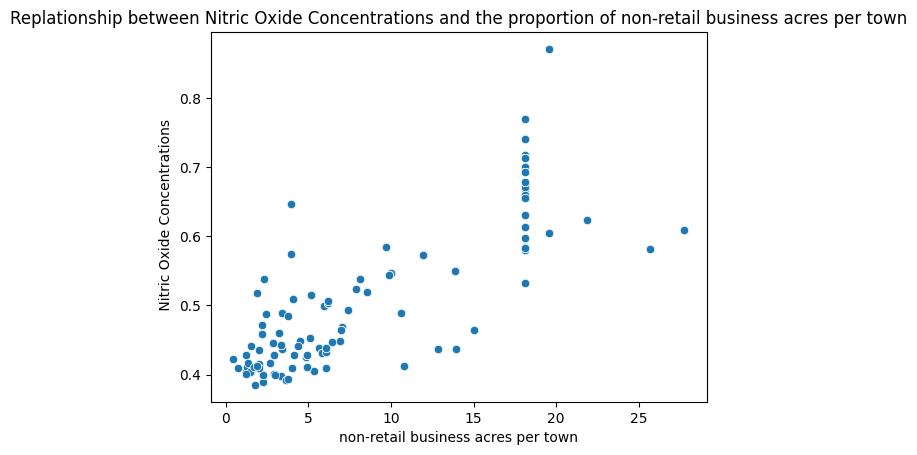

In [6]:
# Scatterplot of the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

sns.scatterplot(x=boston_df['INDUS'],y=boston_df['NOX'])
pyplot.title('Replationship between Nitric Oxide Concentrations and the proportion of non-retail business acres per town')
pyplot.xlabel('non-retail business acres per town')
pyplot.ylabel(' Nitric Oxide Concentrations')
pyplot.show()

In [9]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
 14  age_group   506 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 59.4+ KB


In [ ]:

# Histogram of Pupil to Teacher Ratio Variable
sns.histplot(x = boston_df['PTRATIO'])
pyplot.xlabel('Count')
pyplot.xlabel('pupil-teacher ratio')
pyplot.show()

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


State your hypothesis.
Use α = 0.05
Perform the test Statistics.
State the conclusion from the test.

In [ ]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
# Null Hypothesis (H₀) - there is no significant difference in median value of houses bounded by the charles river
# Alternate Hypothesis - there is a significant difference in median value of houses bounded by the charles river

chas_stat,chas_p = stats.ttest_ind(boston_df['MEDV'],boston_df['CHAS'], equal_var=True)
print(f'T-Test Results\n T-Value:{chas_stat}\nP-Value:{chas_p}')


T-Test Results
 T-Value:54.9210289745203
P-Value:1.4651540072350996e-305


since the p-value is less than 0.05, we reject the Null Hypothesis (H₀). There is a significant different in the median value of the houses bounded by the charles river

In [ ]:
# - Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
# Null Hypothesis (H₀) - there is no significant difference in median value of houses and the age of the home
# Alternate Hypothesis - there is a significant difference in median value of houses and the age of the home

young_tier = boston_df.loc[boston_df['age_group'] == '35 years and younger', 'MEDV']
mid_tier = boston_df.loc[boston_df['age_group'] == 'between 35 and 70 years', 'MEDV']
old_tier = boston_df.loc[boston_df['age_group'] == '70 years and older', 'MEDV']


MEDV_AGE_Stat,MEDV_AGE_P = stats.f_oneway(young_tier,mid_tier,old_tier)
print(f'ANOVA-Test Results\n F-Value:{MEDV_AGE_Stat}\nP-Value:{MEDV_AGE_P}')

ANOVA-Test Results
 F-Value:36.40764999196599
P-Value:1.7105011022702984e-15


since the p-value is less than 0.05, we reject the Null Hypothesis (H₀). There is a significant difference in the median home values for the three different age groups.

In [ ]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
# Null Hypothesis (H₀) - there is no relationship between Nitric Oxide concentrations and the proption of non-retail business acres per town
# Alternate Hypothesis -  there is a relationship between Nitric Oxide concentrations and the proption of non-retail business acres per town

r = boston_df['NOX'].corr(boston_df['INDUS'])
print(f'Correlation: {r:.2f}')


Correlation: 0.76


| Correlation Value | Interpretation                |
| ----------------- | ----------------------------- |
| r = 1             | Perfect positive correlation  |
| 0.7 < r < 1       | Strong positive correlation   |
| 0.3 < r ≤ 0.7     | Moderate positive correlation |
| 0 < r ≤ 0.3       | Weak positive correlation     |
| r = 0             | No correlation                |
| -0.3 < r < 0      | Weak negative correlation     |
| -0.7 < r ≤ -0.3   | Moderate negative correlation |
| -1 < r ≤ -0.7     | Strong negative correlation   |
| r = -1            | Perfect negative correlation  |

Since the r-value is between 0.7 and 1, we can reject the null hypothesis (H₀) - there is a strong postive correlation between the nitric oxide concentrations and the proportion of non-retail business acres in town

In [ ]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
# Null Hypothesis (H₀) - there is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
# Alternate Hypothesis - there is an impact for an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

model_simple = ols('MEDV ~ DIS', data=boston_df).fit()
print("\nSimple Regression Results (MEDV ~ DIS):")
print(model_simple.summary())



Simple Regression Results (MEDV ~ DIS):
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        23:04:31   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  

The t-statistic for DIS is 5.797 and the p value is 0.00, which is less than α = 0.05 - meaning we can reject the null hypothesis (H₀) that there is no impact. There is a significant impact of an additional weighted distance on the median value of owner occupied homes